# フーリエ級数

$\newcommand{\im}{\mathrm{i}}$

ある関数 $f(x)$ ($x\in[0,2\pi]$) を周期 $2\pi$ の周期関数 (任意の $x\in\mathbb{R}$ に対して、$f(x)=f(x+L)$ となる関数を周期 $L$ の周期関数という) とする。
このとき

$$
	f(x)=\frac{a_0}{2}+\sum_{n=1}^{\infty}a_n\cos(nx)+\sum_{n=1}^{\infty}b_n\sin(nx),
$$

となる無限級数を**フーリエ級数**という。ここで $a_n , b_n$ はフーリエ係数といい

\begin{align*}
%a_0&=\frac{1}{2\pi}\int_0^{2\pi}f(x)dx,\\
a_n&=\frac{1}{\pi}\int_0^{2\pi}f(x)\cos(nx)dx,\quad n\ge 0,\\
b_n&=\frac{1}{\pi}\int_0^{2\pi}f(x)\sin(nx)dx,\quad n\ge 1
\end{align*}

で定められる。また、$\cos(nx) = \frac{e^{\im nx} + e^{-\im nx}}2$, $\sin(nx)=\frac{e^{\im nx} - e^{-\im nx}}{2\im}$ ($\im = \sqrt{-1}$ は虚数単位) という関係を用いて

$$
	f(x)=\sum_{k=-\infty}^{\infty}c_k e^{\im k x},\quad c_k=\frac{1}{2\pi}\int_0^{2\pi}f(x)e^{-\im k x}dx
$$

と複素数を用いた形式も考えられる。これを複素フーリエ級数、$c_k$ を複素フーリエ係数という。これらには関係式

$$
% \begin{aligned}
% c_{0} &=a_{0}/2, \quad k=0 \\
c_{k} = \begin{cases}　a_{0}/2, & k=0 \\
\left(a_{k}-\im b_{k}\right) / 2, & k>0 \\
\left(a_{-k}+\im b_{-k}\right) / 2, & k<0\end{cases}
% \end{aligned}
$$

があり、変換可能である。

## フーリエ級数の性質



### 1. 対称性

周期関数 $f(x)$ が、偶関数の性質

$$
    f(x) = f(-x)
$$

を満たすとすると、サインの係数 $ b_n $ が

$$
    b_n = 0
$$

になるので、この関数のフーリエ級数は、

$$
    f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cos(nx)
$$

と表すことができる。このようにコサイン関数のみで表されるフーリエ級数のことを**フーリエ・コサイン級数**と言う。このとき $c_{-k} = c_k$ も成り立つ。


一方で、$f(x)$が、奇関数の性質

$$
    f(x) = -f(-x)
$$

を満たすとすると、コサインの係数 $ a_n $ が

$$
    a_n = 0
$$

になるので、この関数のフーリエ級数は、
$$
    f(x) = \sum_{n=1}^{\infty}b_n\sin(nx)
$$

と表すことができる。このようにサイン関数のみで表されるフーリエ級数のことを**フーリエ・サイン級数**と言う。このとき $c_{-k}=-c_k$も成り立つ。


### 2. 実数値関数

$f(x)$ が実数値関数 $f(x) \in \mathbb{R}$ であるとき、フーリエ係数 $a_n$, $b_n$ は

$$
    a_n , b_n \in \mathbb{R}
$$

となる。更に、複素フーリエ係数 $c_k$ は、

$$
    c_{-k} = \overline{c_{k}}
$$

を満たす。これは、$f(x) = \overline{f(x)}$ という条件を使うことで確認できる。

### 3. 係数の収束

ある周期関数のフーリエ係数を $a_n$ とおく。このとき、$ n \rightarrow \infty $での収束のオーダーは

$$
    a_n = 
    \begin{cases}
    \mathcal{O}(n^{-k}) & \text{$k$ 次オーダーの収束} \\
    \mathcal{O}(e^{-qn^r}) & \text{$q$ : 定数 , $r>0$ , 指数オーダーの収束} \\
    \mathcal{O}(e^{-qb\log(n)}) & \text{超幾何収束}
    \end{cases}
$$

などのパターンがあり、それぞれ周期関数 $f(x)$ の滑らかさによって決まる。例えば、$f(x)$ が $k$ 次オーダーの収束をする場合は、関数 $f$ は $C^k$-級（$k$ 階連続微分可能）の関数である。指数オーダーの収束をする場合は実解析関数（極や分岐点を持つ一般的な有限区間／無限区間上の関数）である。超幾何収束は、複素平面上で$\infty$以外で特異点を持たない関数(整関数, entire function)の場合におこる。

In [1]:
versioninfo()

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i9-10900K CPU @ 3.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, skylake)


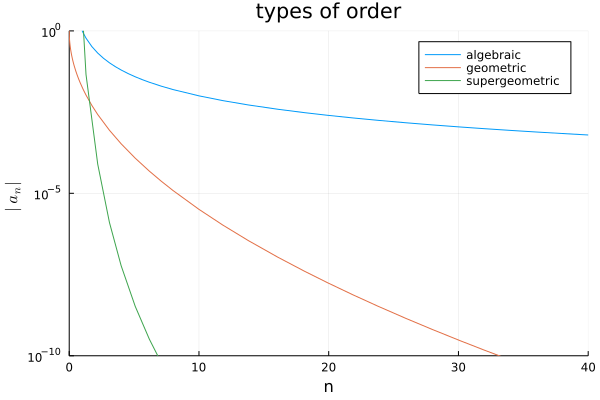

In [2]:
using Plots

k = 2
q = 4
r = 0.5
b = 3


g_1(n) = n^(-k)
g_2(n) = exp(-q*n^r)
g_3(n) = exp(-q*b*log(n))

plot(n -> g_1(n),
    yaxis = :log,
    xlims = (0,40),
    ylims = (10^(-10),10^0),
    xlabel = "n",
    ylabel = "\$|a_n\\,|\$",
    title = "types of order",
    label = "algebraic")

plot!(n -> g_2(n),
    label = "geometric")
plot!(n -> g_3(n),
    label = "supergeometric")
# savefig("typeoforder.pdf")

### 4. その他の便利な性質

- 微分が簡単

$$
    \frac{d}{dx} f(x) = \sum_{k=-\infty}^{\infty} (\im k)c_k e^{\im kx}
$$

- シフトも簡単

$$
    f(x-d) = \sum_{k=-\infty}^{\infty}c_ke^{\im k(x-d)} = \sum_{k=-\infty}^{\infty}(e^{-\im kd})c_ke^{\im kx}
$$

元の係数 $c_k$ に $ik$ や $e^{-\im kd}$ を掛けるだけで演算ができる。

### フーリエ係数の計算方法

周期関数 $f(x)$ のフーリエ係数 $c_k$ を数値計算で求めることを考える。フーリエ係数の添字のサイズ $N$ を $|k|<N$ となるように定める（$N-1$ を最大波数ともいう）。

このとき、$0 = x_0\le x_1\le \dots \le x_{2N-1}=2\pi$ と区間 $[0,2\pi]$ を等間隔に分割した点 $x_j = jh$ ($j = 0,\dots,2N-1$, $h=2\pi/(2N-1)$) を標本点といい、標本点上での関数値を用いて次のようなフーリエ係数の近似を得る。

$$
c_k = \frac{1}{2\pi}\int_0^{2\pi}f(x)e^{-\im k x}dx\approx \frac1{2N-1}\sum_{j=0}^{2N-2} f(x_j) e^{-2\pi \im\frac{kj}{2N-1}}=\bar{c}_k,\quad (|k|<N).
$$

この $\bar{c}_k$ の式は、離散フーリエ変換 ($ a_k = \mathcal{F}_k(b) = \sum_{j=0}^{2M-2}b_j e^{-2\pi \im \frac{jk}{2M-1}}$) によく似ている。


近似されたフーリエ係数 $\bar{c}_k$ を使って、元の関数 $f(x)$ の近似が

$$
f^{(N)}(x) = \sum_{|k|<N} \bar{c}_k e^{\im k x}.
$$

と得られる。

係数の式が離散フーリエ変換に似ていることを活かして、高速フーリエ変換(FFT)を使って係数を求める。例えば、

$$f(x)=\frac{\exp(\sin(5x))}{1+\sin(\cos(x))}$$

として、$N=100$ のときのフーリエ係数の近似は次のように得る。

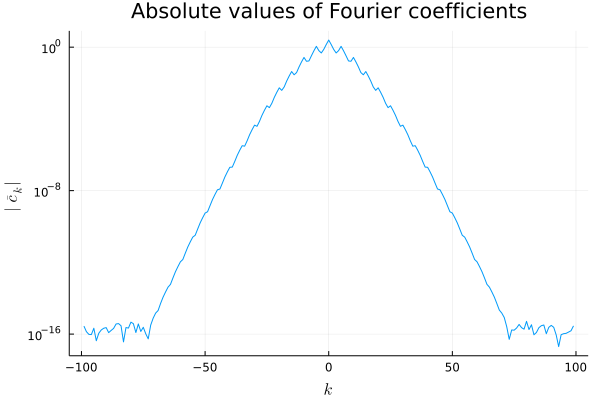

In [3]:
using FFTW, Plots
f(x) = exp(sin(5x))/(1+sin(cos(x)))
# g(x) = sin(x^3*(x-2π)^2/10)
N = 100
# N = 150
# setprecision(104)
# using ApproxFun

function fouriercoeffs(f,N)
    h = (2.0)*π/(2N-1)
    xⱼ = h*(0:2N-2)
    fⱼ = f.(xⱼ);
    return fftshift(fft(fⱼ))/(2N-1)
end

cₖ = fouriercoeffs(f,N)

plot(-N+1:N-1,abs.(cₖ),yscale=:log10,
    legend=false,
    xlabel = "\$k\$",
    ylabel = "\$|\\bar{c}_k\\,|\$",
    yticks = [1e-16,1e-8,1],
    title = "Absolute values of Fourier coefficients"
)
# savefig("valofFouriercoeffs_dd.pdf")

### フーリエ係数から元の関数の概形を求める

関数 $f^{(N)}(x)$ の係数 $\bar{c}_k$ から元の関数をプロットしたい。いま標本点上での関数値は

$$
f^{(N)}(x_j) = \sum_{|k|<N} \bar{c}_k e^{\im k x_j} = \sum_{|k|<N} \bar{c}_k e^{2\pi\im \frac{kj}{2N-1}}.
$$

これは逆離散フーリエ変換に相当する。そこで逆高速フーリエ変換(IFFT)を用いて元の関数を求める。しかし、このままIFFTを用いると、標本点と同じ数の関数値しか得られず、グラフに描画するといびつになってしまう。これを解消するために、フーリエ係数 $\bar{c}_k$ に $0$ を余分に貼り合わせて (paddingという) 、滑らかなグラフを得る。

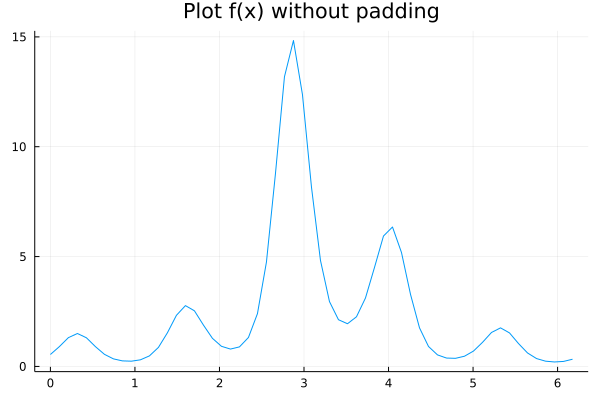

In [4]:
#paddingなし、N=30
f(x) = exp(sin(5x))/(1+sin(cos(x)))
N = 30
cₖ = fouriercoeffs(f,N)
h = 2.0π/(2N-1); xⱼ = h*(0:2N-2)

fᴺⱼ = real((2N-1)*ifft(ifftshift(cₖ)))
plot(xⱼ, fᴺⱼ,
    legend = false,
    title = "Plot f(x) without padding"
)

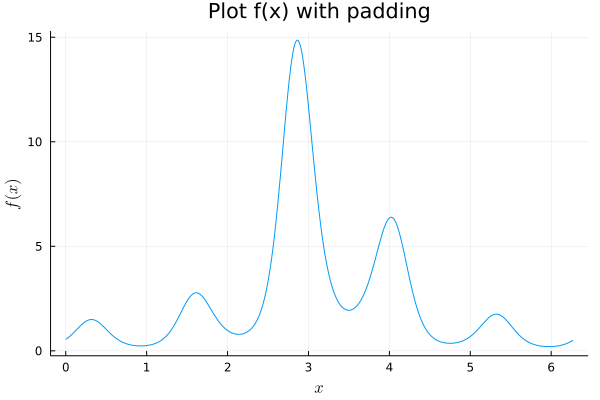

In [5]:
#paddingあり
function plot_fourier(cₖ)
    N = (length(cₖ)+1)/2# 2N-1
    n_pad = 200
    cₖ_pad = [zeros(n_pad);cₖ;zeros(n_pad)]
    N_pad = N + n_pad
    h_pad = 2.0π/(2N_pad-1)
    xⱼ_pad = h_pad*(0:(2N_pad-2))
    
    fᴺⱼ_pad = real((2N_pad-1)*ifft(ifftshift(cₖ_pad)))
    plot(xⱼ_pad, fᴺⱼ_pad, legend=false, title = "Plot f(x) with padding",
        xlabel = "\$x\$",
        ylabel = "\$f(x)\$",)
end

plot_fourier(cₖ)
# savefig("plot_fourier.pdf")

### 周期が $2\pi$ 以外の場合の取り扱い方

$f(t)$ を周期 $L$ の周期関数とする。このとき変数 $t:a\to b$ ($L=b-a$) に対して、変数 $x$ を $x = \omega(t-a)$ ($\omega = 2\pi/L$) と定めると、$x:0\to 2\pi$ となり、関数 $g(x)\equiv f(a + \omega^{-1} x)$ は周期 $2\pi$ の周期関数である。

いま $g(x)$ がフーリエ級数

$$
g(x) = \sum_{k \in \mathbb{Z}} c_k e^{\im k x}
$$

で表されているとすると、

$$
f(t) = g(\omega (t-a)) = \sum_{k \in \mathbb{Z}} c_k e^{\im k \omega (t-a)}% = \sum_{k \in \mathbb{Z}} d_k e^{\im k \omega t},\quad d_k = e^{-\im k \omega a}c_k
$$

が成り立つ。フーリエ係数 $(c_k)_{k\in\mathbb{Z}}$ は

$$
c_k  = \frac{1}{2 \pi} \int_0 ^{2\pi} g(x) e^{-\im k x} dx = \frac{1}{L} \int_a ^b f(t) e^{-\im k \omega (t-a)} dt
$$

となり、$(c_k)_{k\in\mathbb{Z}}$ は次のように近似される。

$$
c_k \approx \frac{1}{2N-1} \sum_{j=0}^{2N-2} f(t_j) e^{-2 \pi \im \frac{kj}{2N-1}}.
$$

ここで、$t_j = a + \frac{jL}{2N-1}$ ($j=0,1,\dots,2N-2$) このことから、周期が $2\pi$ の周期関数とフーリエ係数の近似が同じ式になるため、フーリエ係数の計算方法は、先程と変わらない。

例えば、$g(x) = \frac{\exp(\sin(5x))}{1+\sin(\cos(x))}$ として $f(t)=g(\omega(t-a))$ ($\omega=1.3$ , $a=1$) としたときのフーリエ係数は、以下のようになる。1列目に、 $g(x)$の係数、2列目に、$f(t)$の係数となっている。

In [6]:
function fouriercoeffs(f, N, I=[0,2π])
    a = I[1]; b = I[2]
    h = (b-a)/(2N-1)
    j = 0:2N-2
    xⱼ = a .+ j*h
    fⱼ = f.(xⱼ);
    return fftshift(fft(fⱼ))/(2N-1)
end

N = 30
g(x) = exp(sin(5x))/(1+sin(cos(x)))
ω = 1.3
a = 1
f(t) = g(ω*(t-a))
c = fouriercoeffs(g,N)
d = fouriercoeffs(f,N,[a,a+2π/ω])
k = (-N+1):(N-1)
reshape([c;d],2N-1,2)


59×2 Matrix{ComplexF64}:
  -2.15843e-5+4.62015e-5im    -2.15843e-5+4.62015e-5im
   2.08063e-5-7.85557e-5im     2.08063e-5-7.85557e-5im
  -3.06997e-5+0.000158693im   -3.06997e-5+0.000158693im
   6.17556e-5-0.000295954im    6.17556e-5-0.000295954im
 -0.000141767+0.000519609im  -0.000141767+0.000519609im
  0.000328941-0.000266649im   0.000328941-0.000266649im
 -0.000738977+7.88187e-5im   -0.000738977+7.88187e-5im
   0.00158814+0.000121103im    0.00158814+0.000121103im
  -0.00300286-0.000442078im   -0.00300286-0.000442078im
   0.00530156+0.00112468im     0.00530156+0.00112468im
  -0.00284146-0.00265977im    -0.00284146-0.00265977im
   0.00112054+0.00599797im     0.00112054+0.00599797im
  0.000445755-0.0129059im     0.000445755-0.0129059im
             ⋮               
   0.00112054-0.00599797im     0.00112054-0.00599797im
  -0.00284146+0.00265977im    -0.00284146+0.00265977im
   0.00530156-0.00112468im     0.00530156-0.00112468im
  -0.00300286+0.000442078im   -0.00300286+0.000442078im
   0

また、グラフを描写してみると、シフトによるずれを表現できていることがわかる。

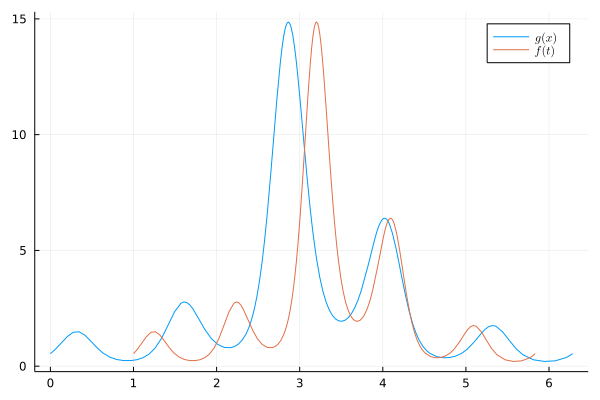

In [7]:
plot(g,0,2π, label = "\$g(x)\$")
plot!(f,a,a+2π/ω, label = "\$f(t)\$")
# savefig("plot_profiles.pdf")

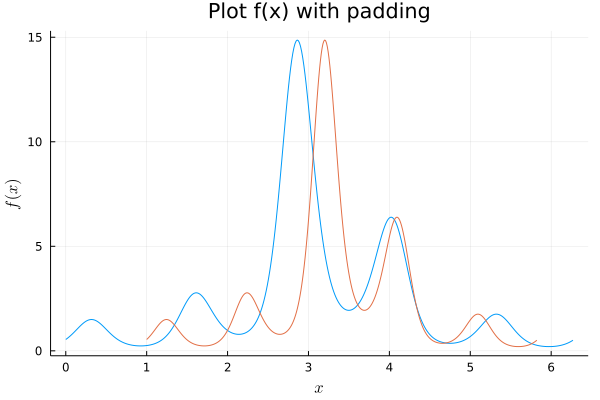

In [8]:
function plot_fourier!(bc, I=[0,2π])
    a = I[1]; b = I[2]
    N = (length(bc)+1)/2 # 2N-1
    n_pad = 200
    bc_pad = [zeros(n_pad);bc;zeros(n_pad)]
    N_pad = N + n_pad
    h_pad = (b-a)/(2N_pad-1)
    xj_pad = a .+ h_pad*(0:2N_pad-2)

　　fNj_pad = real((2N_pad-1)*ifft(ifftshift(bc_pad)))
　　plot!(xj_pad, fNj_pad, legend=false,
　　    xlabel = "\$x\$", ylabel = "\$f(x)\$")
end

plot_fourier(c)
plot_fourier!(d,[a,a+2π/ω])

本資料は以下のような文献・Web ページ等を参考にこの文章は書いています。

### 参考文献

1. John P. Boyd, Chebyshev and Fourier Spectral Methods_, Dover Publications, 2001.<br>
(フーリエ級数を使ったスペクトル法の教科書、FFTを使って高速に数値計算できることが紹介されている。)
1. Lloyd N. Trefethen, Spectral Methods in MATLAB, SIAM, 2000.<br>
(スペクトル法のMATLABによる実装を通して学ぶ教科書、この記事はこの本のスタイルをお手本としている。)
1. 石岡圭一, スペクトル法による数値計算入門, 東京大学出版会, 2004.<br>
(スペクトル法を紹介している唯一の和書（たぶん）、FFTやODEの数値解法など丁寧に紹介されている。)
1. エリアス・M.スタイン ラミ・シャカルチ 著 新井 仁之 杉本 充 高木 啓行 千原 浩之 訳, プリンストン解析学講義１ フーリエ解析入門, 日本評論社, 2007.<br>
(プリンストン大学の数学科によるフーリエ解析の標準的教科書。分かりやすく深い話までしっかり勉強できる。)
1. 大石進一, フーリエ解析 (理工系の数学入門コース 6) 岩波書店 1989.<br>
(教員の師匠によるフーリエ解析の教科書。絶妙なバランスで学習者をフーリエ解析の本質に導いてくれる。)

<div align="right">高橋和暉, <a href="http://www.risk.tsukuba.ac.jp/~takitoshi/">高安亮紀</a>，2022年2月21日</div>